# The Spark Foundation GRIPFEB2021

## Name: Samta Malik

## TASK 1: Prediction using Unsupervised ML 

### Problem Statement  : From the given "Iris" dataset, predict the optimum number of clusters and represent it visually.

## Steps

1. Reading and Understanding the Data
2. EDA: Univariate and Bivariate
3. Outlier Analysis
4. Rescaling the Features
5. Hopkin's Test
6.  CLUSTERING:
     1. Kmeans Clustering
    -  Visualize it using scatterplot
     2. Hierarchial Clustering: Single linkage, Complete Linkage


# Step 1 :Reading and Understanding the Data

In [244]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [245]:
# Reading the dataset 

df =pd.read_csv("Iris.csv",encoding='utf-8',engine='python')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [246]:
# Check the datatype of the columns

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [247]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [248]:
df.shape

(150, 6)

In [249]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


### Data Preparation

**Handling missing values**

In [250]:
# Checking for missing values

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**No missing values, hence we can proceed with the data analysis.**

### Data Transformation

In [251]:
df.drop('Species', axis=1, inplace=True)

In [252]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


# Step2:  EDA- Univariate and Bivariate

In [253]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [254]:
col = list(df.columns)
col

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [255]:
col = col[1:5]
col

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

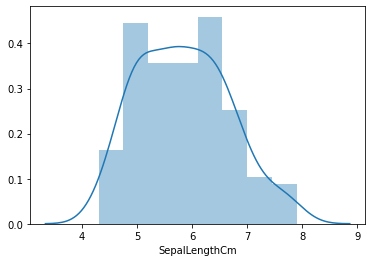

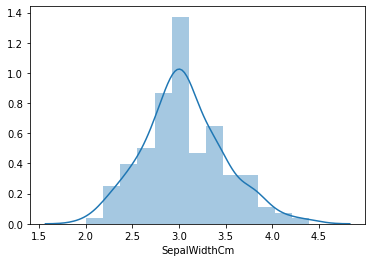

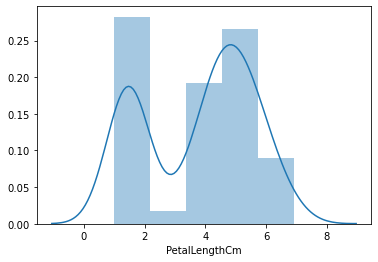

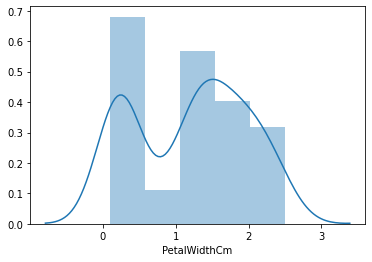

In [256]:
# Distribution of the columns: distplot()

for c in col:
    sns.distplot(df[c])
    plt.show();

**sepal_length and sepal_width:**
They are normally distributed which means that there are lesser chances for any internal grouping.

**petal_length and petal_width:**
They are bimodal distribution which means that there are higher chances for internal grouping.


In [257]:
# Plotting the correlation table

df[col].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


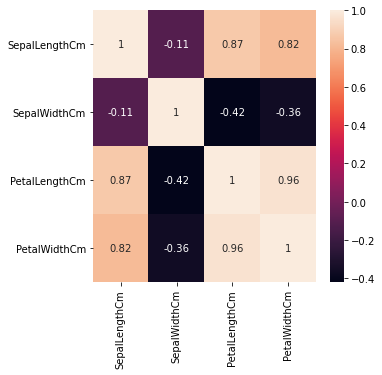

In [258]:
# Plotting heat map to see the correlation

plt.figure(figsize=(5,5))
sns.heatmap(df[col].corr(), annot=True);

# Step 3: Outlier analysis

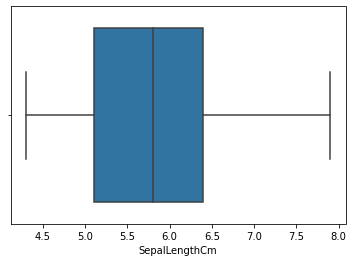

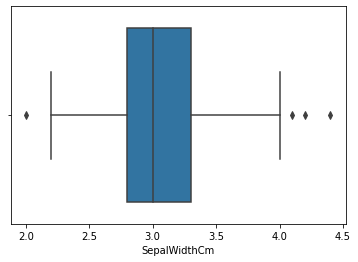

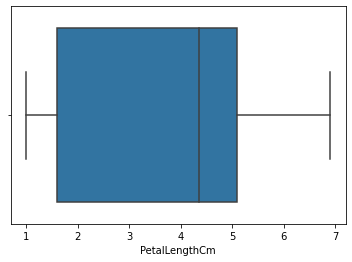

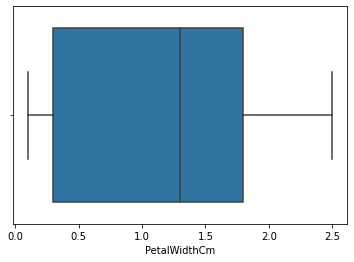

In [259]:
for c in col:
    sns.boxplot(df[c])
    plt.show();

# Step 4: Hopkins test

In [260]:
#Calculating the Hopkins statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [261]:
hopkins(df.drop('Id', axis=1))

0.82587723150956

# Step 5: Rescaling the features

In [262]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(df.drop('Id', axis=1))

In [263]:
df1

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [264]:
df1 = pd.DataFrame(df1)
df1.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [265]:
col

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [266]:
df1.columns = col

In [267]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [268]:
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])

silhoutte = pd.DataFrame(ss)
    
    

In [269]:
silhoutte

,0,1
0,2,0.580184
1,3,0.458972
2,4,0.387182
3,5,0.343743
4,6,0.328002
5,7,0.351905
6,8,0.316391
7,9,0.333537
8,10,0.352697


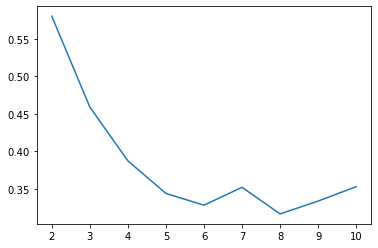

In [270]:
plt.plot(silhoutte[0], silhoutte[1]);

**We see the highest Silhoutte score at 2. However, in practice, it is never to be considered.
Therefore, we choose the next highest value i.e. 3.**


# Step 6: Modelling (Clustering)

##  Performing the kMeans analysis

In [271]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [272]:
# see the centroid values the algorithm generated for the final clusters
kmeans.cluster_centers_

array([[ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

In [273]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [274]:
df['labels'] = kmeans.labels_

In [275]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [276]:
df['labels'].value_counts()

2    53
1    50
0    47
Name: labels, dtype: int64

## Visualize it using scatterplot

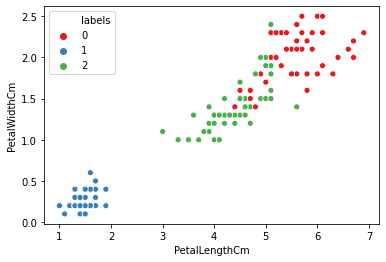

In [277]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue= 'labels', data=df, palette='Set1');

## Cluster profiling

In [278]:
df[['PetalLengthCm','PetalWidthCm', 'labels']].groupby('labels').mean()

,PetalLengthCm,PetalWidthCm
labels,,
0,5.510638,1.972340
1,1.464000,0.244000
2,4.369811,1.413208


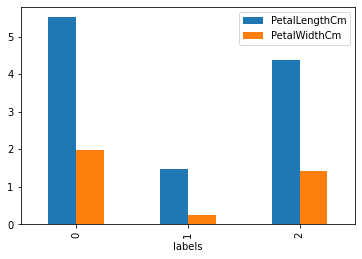

In [279]:
df[['PetalLengthCm','PetalWidthCm', 'labels']].groupby('labels').mean().plot(kind= 'bar');

## Hierarchial Clustering: Single linkage, Complete Linkage

In [280]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


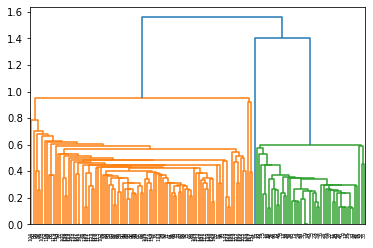

In [281]:
# single linkage
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

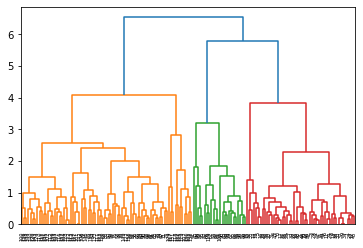

In [282]:
# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [283]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [284]:
# assign cluster labels

df1['cluster_labels'] = cluster_labels
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_labels
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


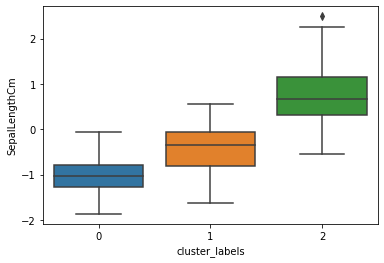

In [285]:
# plots
sns.boxplot(x='cluster_labels', y='SepalLengthCm', data=df1);

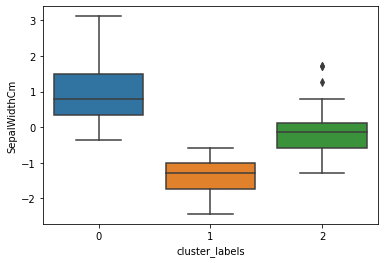

In [286]:
# plots
sns.boxplot(x='cluster_labels', y='SepalWidthCm', data=df1);

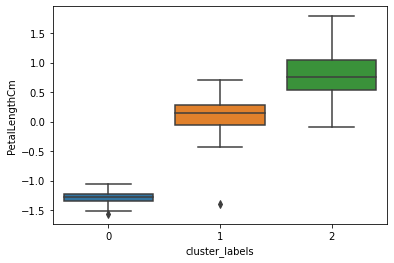

In [287]:
# plots
sns.boxplot(x='cluster_labels', y='PetalLengthCm', data=df1);

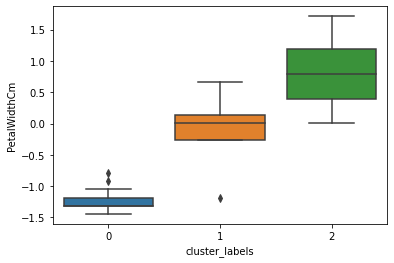

In [288]:
# plots
sns.boxplot(x='cluster_labels', y='PetalWidthCm', data=df1);